# St20173906 CIS7031 WRIT1

## Programming for Data Analytics



# Breakdown of this notebook:
 **Importing the Libraries**


1)  **Data processing :** <br>
 - Renaming the columns.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset and replacing with Mean

2) **Data analysis:** <br>

3). **Visual analysis:** Using plots to find relations between the features.
 - scatter/bubble plot using Plotly express. 
 
4) **Correlation :** Using plots to find relations between the features.

5) **Clustering (k means & hierarchical):** 

6) **Discussion (k means & hierarchical):** 
    

In [1]:

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
fig = go.Figure()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import decomposition

### 1) Data processing :

#### Loading and cleaning the datasets individually

In [2]:
import glob            
path = "C:/Users/kvsha/Projects/wales/Excel files/Employee dataset/"
all_files = glob.glob(path + "20*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=1, ignore_index=True)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,All industries,NaN,1336300,All industries,NaN,1330500,All industries,NaN,1346700,All industries,...,1403800,All industries,NaN,1408900,All industries,NaN,1422800,All industries,NaN,1452100
1,All industries,"Agriculture, forestry and fishing",37700,All industries,"Agriculture, forestry and fishing",38200,All industries,"Agriculture, forestry and fishing",36100,All industries,...,40700,All industries,"Agriculture, forestry and fishing",43200,All industries,"Agriculture, forestry and fishing",40200,All industries,"Agriculture, forestry and fishing",41100
2,NaN,Production,156700,NaN,Production,149800,NaN,Production,158600,NaN,...,172300,NaN,Production,162500,NaN,Production,165100,NaN,Production,165700
3,NaN,Construction,96600,NaN,Construction,93200,NaN,Construction,90000,NaN,...,92600,NaN,Construction,102700,NaN,Construction,90800,NaN,Construction,101800
4,NaN,"Wholesale, retail, transport, hotels and food",345400,NaN,"Wholesale, retail, transport, hotels and food",344500,NaN,"Wholesale, retail, transport, hotels and food",343100,NaN,...,357700,NaN,"Wholesale, retail, transport, hotels and food",360200,NaN,"Wholesale, retail, transport, hotels and food",333500,NaN,"Wholesale, retail, transport, hotels and food",347600
5,NaN,Information and communication,27800,NaN,Information and communication,27900,NaN,Information and communication,26400,NaN,...,24000,NaN,Information and communication,34400,NaN,Information and communication,58900,NaN,Information and communication,31500
6,NaN,Finance and insurance activities,33800,NaN,Finance and insurance activities,29800,NaN,Finance and insurance activities,33200,NaN,...,30800,NaN,Finance and insurance activities,31000,NaN,Finance and insurance activities,32100,NaN,Finance and insurance activities,35500
7,NaN,Real estate activities,13500,NaN,Real estate activities,14600,NaN,Real estate activities,17600,NaN,...,19100,NaN,Real estate activities,22700,NaN,Real estate activities,18200,NaN,Real estate activities,25200
8,NaN,"Professional, scientific and technical activit...",144800,NaN,"Professional, scientific and technical activit...",145800,NaN,"Professional, scientific and technical activit...",143600,NaN,...,166200,NaN,"Professional, scientific and technical activit...",161200,NaN,"Professional, scientific and technical activit...",176400,NaN,"Professional, scientific and technical activit...",187100
9,NaN,"Public administration, defence, education and ...",415600,NaN,"Public administration, defence, education and ...",418600,NaN,"Public administration, defence, education and ...",425600,NaN,...,423200,NaN,"Public administration, defence, education and ...",418500,NaN,"Public administration, defence, education and ...",424500,NaN,"Public administration, defence, education and ...",434900


In [4]:
df=data.drop(columns = [0,3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28],axis = 1)
concat=df.drop(df.index[[0]])
concat.rename(columns={1:'Industry',2:'2009',5:'2010', 8:'2011',11:'2012',14:'2013',17:'2014', 20:'2015',23:'2016',26:'2017',29:'2018'}, inplace=True)
concat

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance and insurance activities,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real estate activities,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,"Professional, scientific and technical activit...",144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,"Public administration, defence, education and ...",415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other service activities,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


### Concanating the all the available data source data files into single file

### 1.2 Checking for Null Values:


In [5]:
concat.isnull()

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False


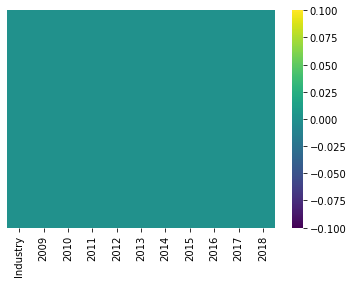

In [6]:
sns.heatmap(concat.isnull(),yticklabels=False,cmap='viridis')

- Wherever we find the NAN values in the dataframe we replace them using the mean values.Now we calculate mean for each industry with respect to Rows.

In [7]:
#calculating mean
dataset_mean=concat.mean(axis=1)

#Replacing the null values with mean value
concat=concat.fillna(dataset_mean)
concat


,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance and insurance activities,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real estate activities,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,"Professional, scientific and technical activit...",144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,"Public administration, defence, education and ...",415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other service activities,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


- Replacing all the NAN values with mean value.However as there are no NAN values present in the dataframe even after applying mean to NAN values,the datafram doesnot changes.

####  1.3  Updating Industry Names:

 In the wales total employment dataset there are few other sub-categories under a major industry. Each sub category member of employees associated with each category is also presented in the dataset. However, based on total employees in a major industry a modified dataset has been created. In the first column of the dataset, 10 major industries are listed and in the right side 10 years, values are given (from 2009 to 2018)

In [8]:
concat["Industry"]= concat["Industry"].replace({'Agriculture, forestry and fishing ': 'Agriculture'})

concat["Industry"]= concat["Industry"].replace({'Wholesale, retail, transport, hotels and food ': 'Retail'})

concat["Industry"]= concat["Industry"].replace({'Information and communication ': 'ICT'})

concat["Industry"]= concat["Industry"].replace({'Finance and insurance activities ': 'Finance'})

concat["Industry"]= concat["Industry"].replace({'Real estate activities ': 'Real_Estate'})

concat["Industry"]= concat["Industry"].replace({'Public administration, defence, education and health ': 'Public_Adminstration'})

concat["Industry"]= concat["Industry"].replace({'Other service activities ': 'Other_Service'})

concat["Industry"]= concat["Industry"].replace({'Professional, scientific and technical activities; administrative and support service activities ' : 'Professional_Service'})

concat["Industry"]= concat["Industry"].replace({'administrative and support service activities ': 'Professional_Service'})

concat

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


### 2. Data Analysis
#### 2.1.	Which industry employed highest and lowest workers over the period?r)


In [9]:
df= pd.DataFrame(concat)
df

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
4,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
5,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
6,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
7,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
8,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
9,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
10,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


 - After creating the dataframe(df) calculating total number of workers for every industry who has highest and lowest employment from 2009 - 2018.

In [10]:
df['calculated_sum'] = df.sum(axis=1)
df

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,calculated_sum
1,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100,392800
2,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700,1622600
3,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800,945300
4,Retail,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600,3461700
5,ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500,320700
6,Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500,322100
7,Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200,189900
8,Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100,1565200
9,Public_Adminstration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900,4236500
10,Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800,740800


 - From the above analysis it is clear that public administration has highest number of workers when compared to other industries.Now lets find the max value from dataframe, to get exact analysis.

In [11]:
df['calculated_sum'].max()

4236500

 ###### Answer- 
 
 - Public administration is largest

        Calculating the lowest employment from the dataframe 

In [12]:
df['calculated_sum'].min()

189900

######  Answer:

- Real estate industry has least number of employment.

###### Visualization for largest and lowest employement

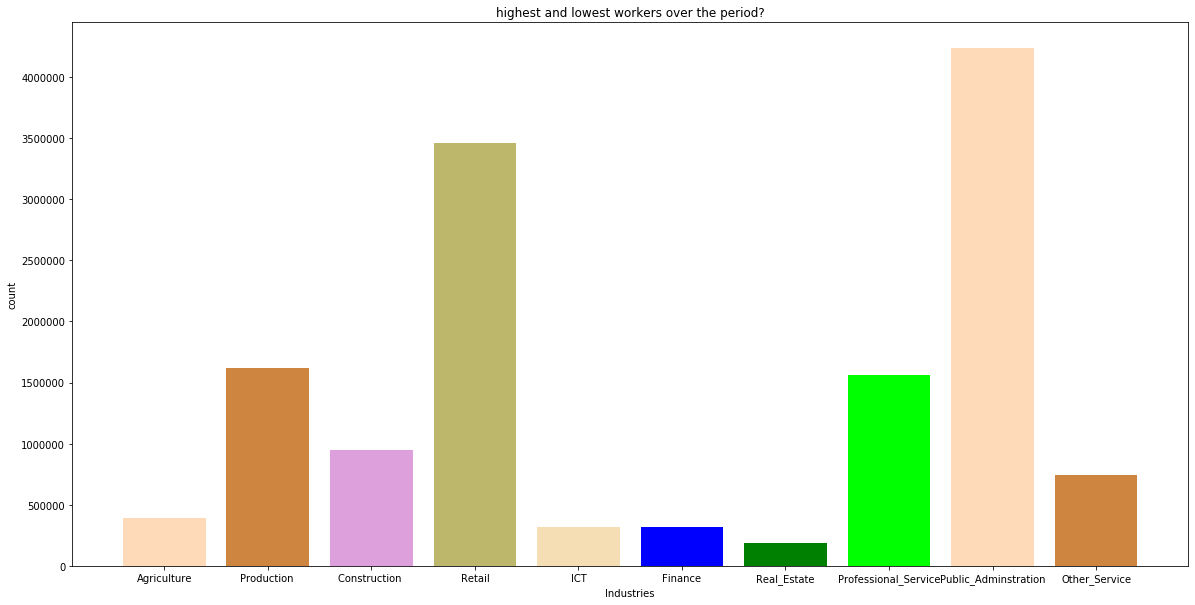

In [13]:
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [20,10]

# x-coordinates of left sides of bars  
left = df['Industry'] 

# heights of bars 
height = df['calculated_sum']

# plotting a bar chart 
plt.bar(left, height, 
        width = 0.8, color = ['peachpuff','peru','plum','darkkhaki', 'wheat','blue','green','lime'])

  # naming the x-axis 
plt.xlabel('Industries') 
# naming the y-axis 
plt.ylabel('count') 
# plot title 
plt.title('highest and lowest workers over the period?') 
  
# function to show the plot 
plt.show() 

### Answer:

- By considering 10 wales employment datasets.Initially we calculate the sum of employes for specific industries.then by using max and min functions we get the highest and lowest employment values over the period 2009-2018.From the above bar chart we can interpret that Public_Adminstration industry has higest number of workes (4236500.0 ) and where as Real_Estate industry has lowest workers (189900.0) over the period of 2009 to 2018.




### 2.2 	Which industry has the highest and lowest overall growth over the period? 

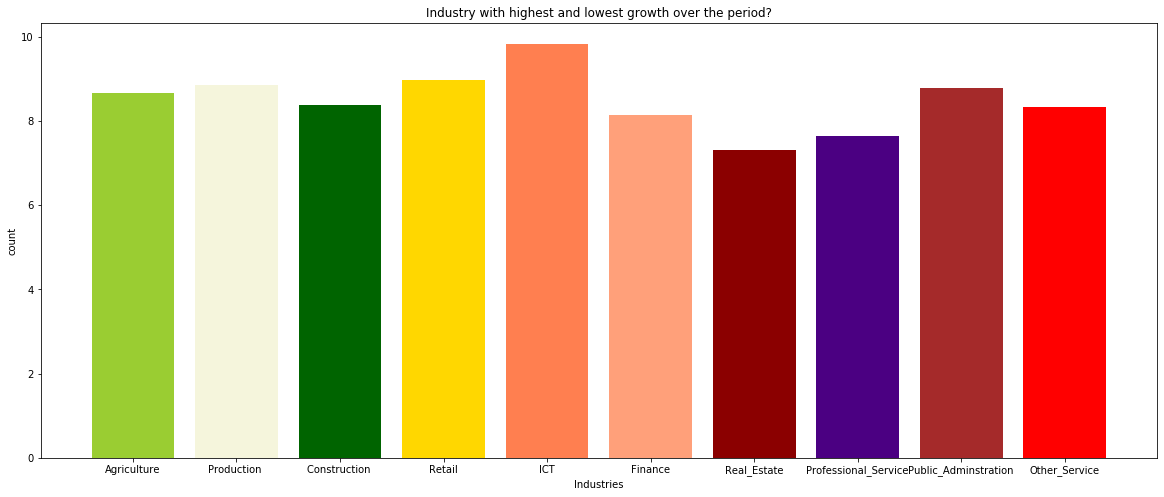

In [14]:
# Calculating the percentage change of growth year by year of every industrail sector

df_HL = df.iloc[:, 1:].pct_change(axis =1)
df_HL['Industry'] = pd.Series(df['Industry'])
df_HL['percentage'] = df_HL.sum(axis=1)


## Plotting visualizations

plt.rcParams['figure.figsize'] = [20,8]

# x-coordinates of left sides of bars  
left = df['Industry']

# heights of bars 
height =df_HL['percentage'] 

# plotting a bar chart 
plt.bar(left, height, 
        width = 0.8, color = ['yellowgreen','beige','darkgreen', 'gold', 'coral','lightsalmon','darkred','indigo','brown','red'])

  # naming the x-axis 
plt.xlabel('Industries') 
# naming the y-axis 
plt.ylabel('count') 
# plot title 
plt.title('Industry with highest and lowest growth over the period?') 
  
# function to show the plot 
plt.show() 

### Solution

-Analyzed the average growth rate of workers over the period To measure it first. we calculated the percenttage growth in workers for each year indicually and based on reluts we came up to point that ICT ( 9.9 percentage) has highest complete growth when compared to others. However Real Estate is significantly lower compared to others( 7.3 percentage)


### 2.3.Which years are the best and worst performing year in relation to number of employment. (highest and                    lowest employment) 

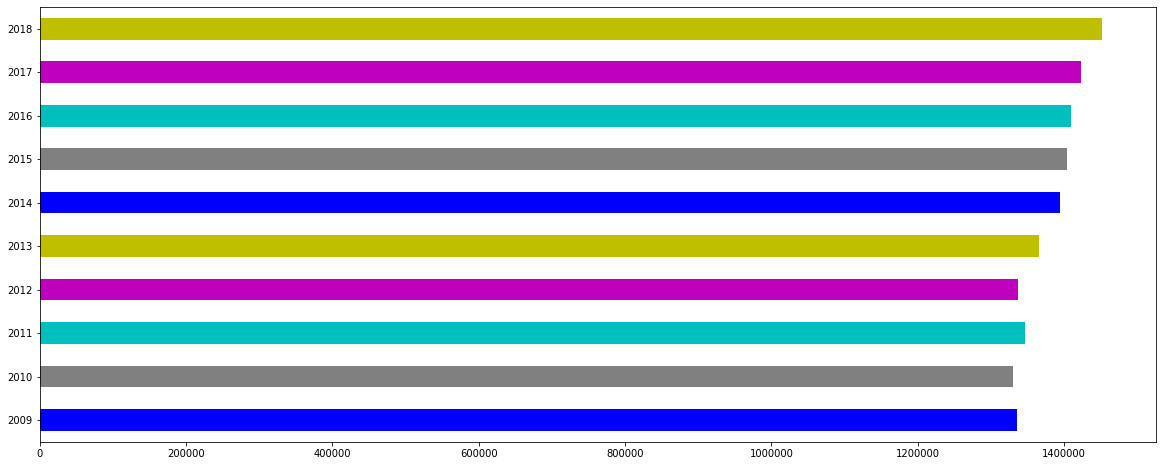

In [15]:
year_BW = df.drop(['Industry','calculated_sum'], axis =1).sum(axis = 0)
year_BW.plot(kind='barh',color = ['b','grey','c','m','y'])

### Solution

-  Calculated the employment count by plotting barh graph with taking years as Y axis and count as X axis and above barh graph clearly represents that the year 2018 is the best performing year having with total number of employment equal to  1452200.0. On the other side 2010 is the worst performing year with employers of 1330400.0

- Each year sum is plotted by different colors in above barh graph


## 3. Visual analysis

In [16]:
df.columns

Index(['Industry', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'calculated_sum'],
      dtype='object')

In [17]:
print(df.index)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


In [80]:
wales

,Industry,variable,value
0,Agriculture,2009,37700
1,Production,2009,156700
2,Construction,2009,96600
3,Retail,2009,345400
4,ICT,2009,27800
...,...,...,...
95,Finance,2018,35500
96,Real_Estate,2018,25200
97,Professional_Service,2018,187100
98,Public_Adminstration,2018,434900


In [107]:
years= ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018']

industry=['Agriculture', 'Construction ', 'Finance', 'ICT', 'Other_Service',
       'Production ', 'Professional_Service', 'Public_Adminstration',
       'Real_Estate', 'Retail'] 

wales = df.drop(columns = 'calculated_sum')
wales['Industry'] = wales.Industry
wales= pd.melt(wales, id_vars = ['Industry'])

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2",
                 "seaborn", "simple_white", "none"]:
    fig.update_layout(template=template)
fig = px.scatter(wales,x = 'value', y = 'Industry', animation_frame="variable",color='value',
                 animation_group="value",size ='value',
                 size_max=50,color_discrete_map={ "Male": "RebeccaPurple", "Female": "MediumPurple"},
                 template="plotly_dark")
fig.show()


 - By using plotly_express a scatter plot diagram has been developed based on the number of employees from each industry. If a dataset consists of similar values in these situations, scatter diagrams are very helpful.Surprisingly, it can be easily determined that the values or numbers of employees from each industry are not that relative enough. Similar values always represent a congested scatter diagram. Based on the movement of each plot, movement of employment has been shown. 

## 4.	PCA/Correlation 

#### 4.1.	Undertake a PCA (PC=2; columns should be like PC1, PC2, Industry) and produce a scatter plot.  Write your interpretation about the plot and in relation to the analysis of section 2 & 3 (for example which industries are correlated over the years as well as in PCA etc.)

PCA will find optimal number of components which capture the greatest amount of variance in the data.

In [20]:
df_pca=df.drop(["Industry","calculated_sum"],axis=1)
pca = decomposition.PCA(n_components=2,)
pca.fit(df_pca)
pca_overall=pca.fit_transform(df_pca)

In [21]:
pca_overall

array([[-312091.23452942,   -8151.21941986],
       [  76819.89713599,     912.46986192],
       [-137358.5225766 ,   -8786.80389798],
       [ 658534.19842893,  -15872.69085371],
       [-335201.17163604,   10284.0003331 ],
       [-334432.78607384,  -10293.85962173],
       [-376204.46340431,   -7409.96075726],
       [  58629.49303694,   33479.53406698],
       [ 903354.93466336,    2773.17367459],
       [-202050.34504502,    3065.35661394]])

- shows that the first three components explain the majority of the variance in our data. For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters.

In [22]:
pca_overall= pd.DataFrame(data = pca_overall,columns = ['PC1', 'PC2'])
pca_overall.index += 1
pca_overall['Industry'] = df['Industry']
pca_overall

,PC1,PC2,Industry
1,-312091.234529,-8151.219420,Agriculture
2,76819.897136,912.469862,Production
3,-137358.522577,-8786.803898,Construction
4,658534.198429,-15872.690854,Retail
5,-335201.171636,10284.000333,ICT
6,-334432.786074,-10293.859622,Finance
7,-376204.463404,-7409.960757,Real_Estate
8,58629.493037,33479.534067,Professional_Service
9,903354.934663,2773.173675,Public_Adminstration
10,-202050.345045,3065.356614,Other_Service


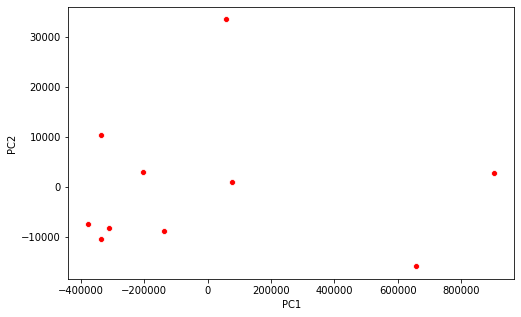

In [23]:
plt.rcParams['figure.figsize'] = [8,5]
sns.scatterplot(x = pca_overall['PC1'], y = pca_overall['PC2'],color='red')

### 4.2.	Make a year wise correlation for each industry.  Does the aforementioned industries are also correlated over the years? Explain your answer

In [24]:
df_1=df.drop(["calculated_sum"],axis=1).corr()
df_1

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2009,1.000000,0.999727,0.999414,0.999368,0.999193,0.998697,0.998396,0.999272,0.994614,0.996296
2010,0.999727,1.000000,0.999572,0.999578,0.999329,0.998561,0.998301,0.999244,0.995403,0.996858
2011,0.999414,0.999572,1.000000,0.999740,0.999859,0.999218,0.998314,0.998368,0.995285,0.996524
2012,0.999368,0.999578,0.999740,1.000000,0.999387,0.998415,0.997753,0.998475,0.993935,0.995168
2013,0.999193,0.999329,0.999859,0.999387,1.000000,0.999440,0.998973,0.998499,0.996068,0.997286
2014,0.998697,0.998561,0.999218,0.998415,0.999440,1.000000,0.998214,0.997781,0.996494,0.996945
2015,0.998396,0.998301,0.998314,0.997753,0.998973,0.998214,1.000000,0.999051,0.995520,0.998101
2016,0.999272,0.999244,0.998368,0.998475,0.998499,0.997781,0.999051,1.000000,0.995094,0.997167
2017,0.994614,0.995403,0.995285,0.993935,0.996068,0.996494,0.995520,0.995094,1.000000,0.997204
2018,0.996296,0.996858,0.996524,0.995168,0.997286,0.996945,0.998101,0.997167,0.997204,1.000000


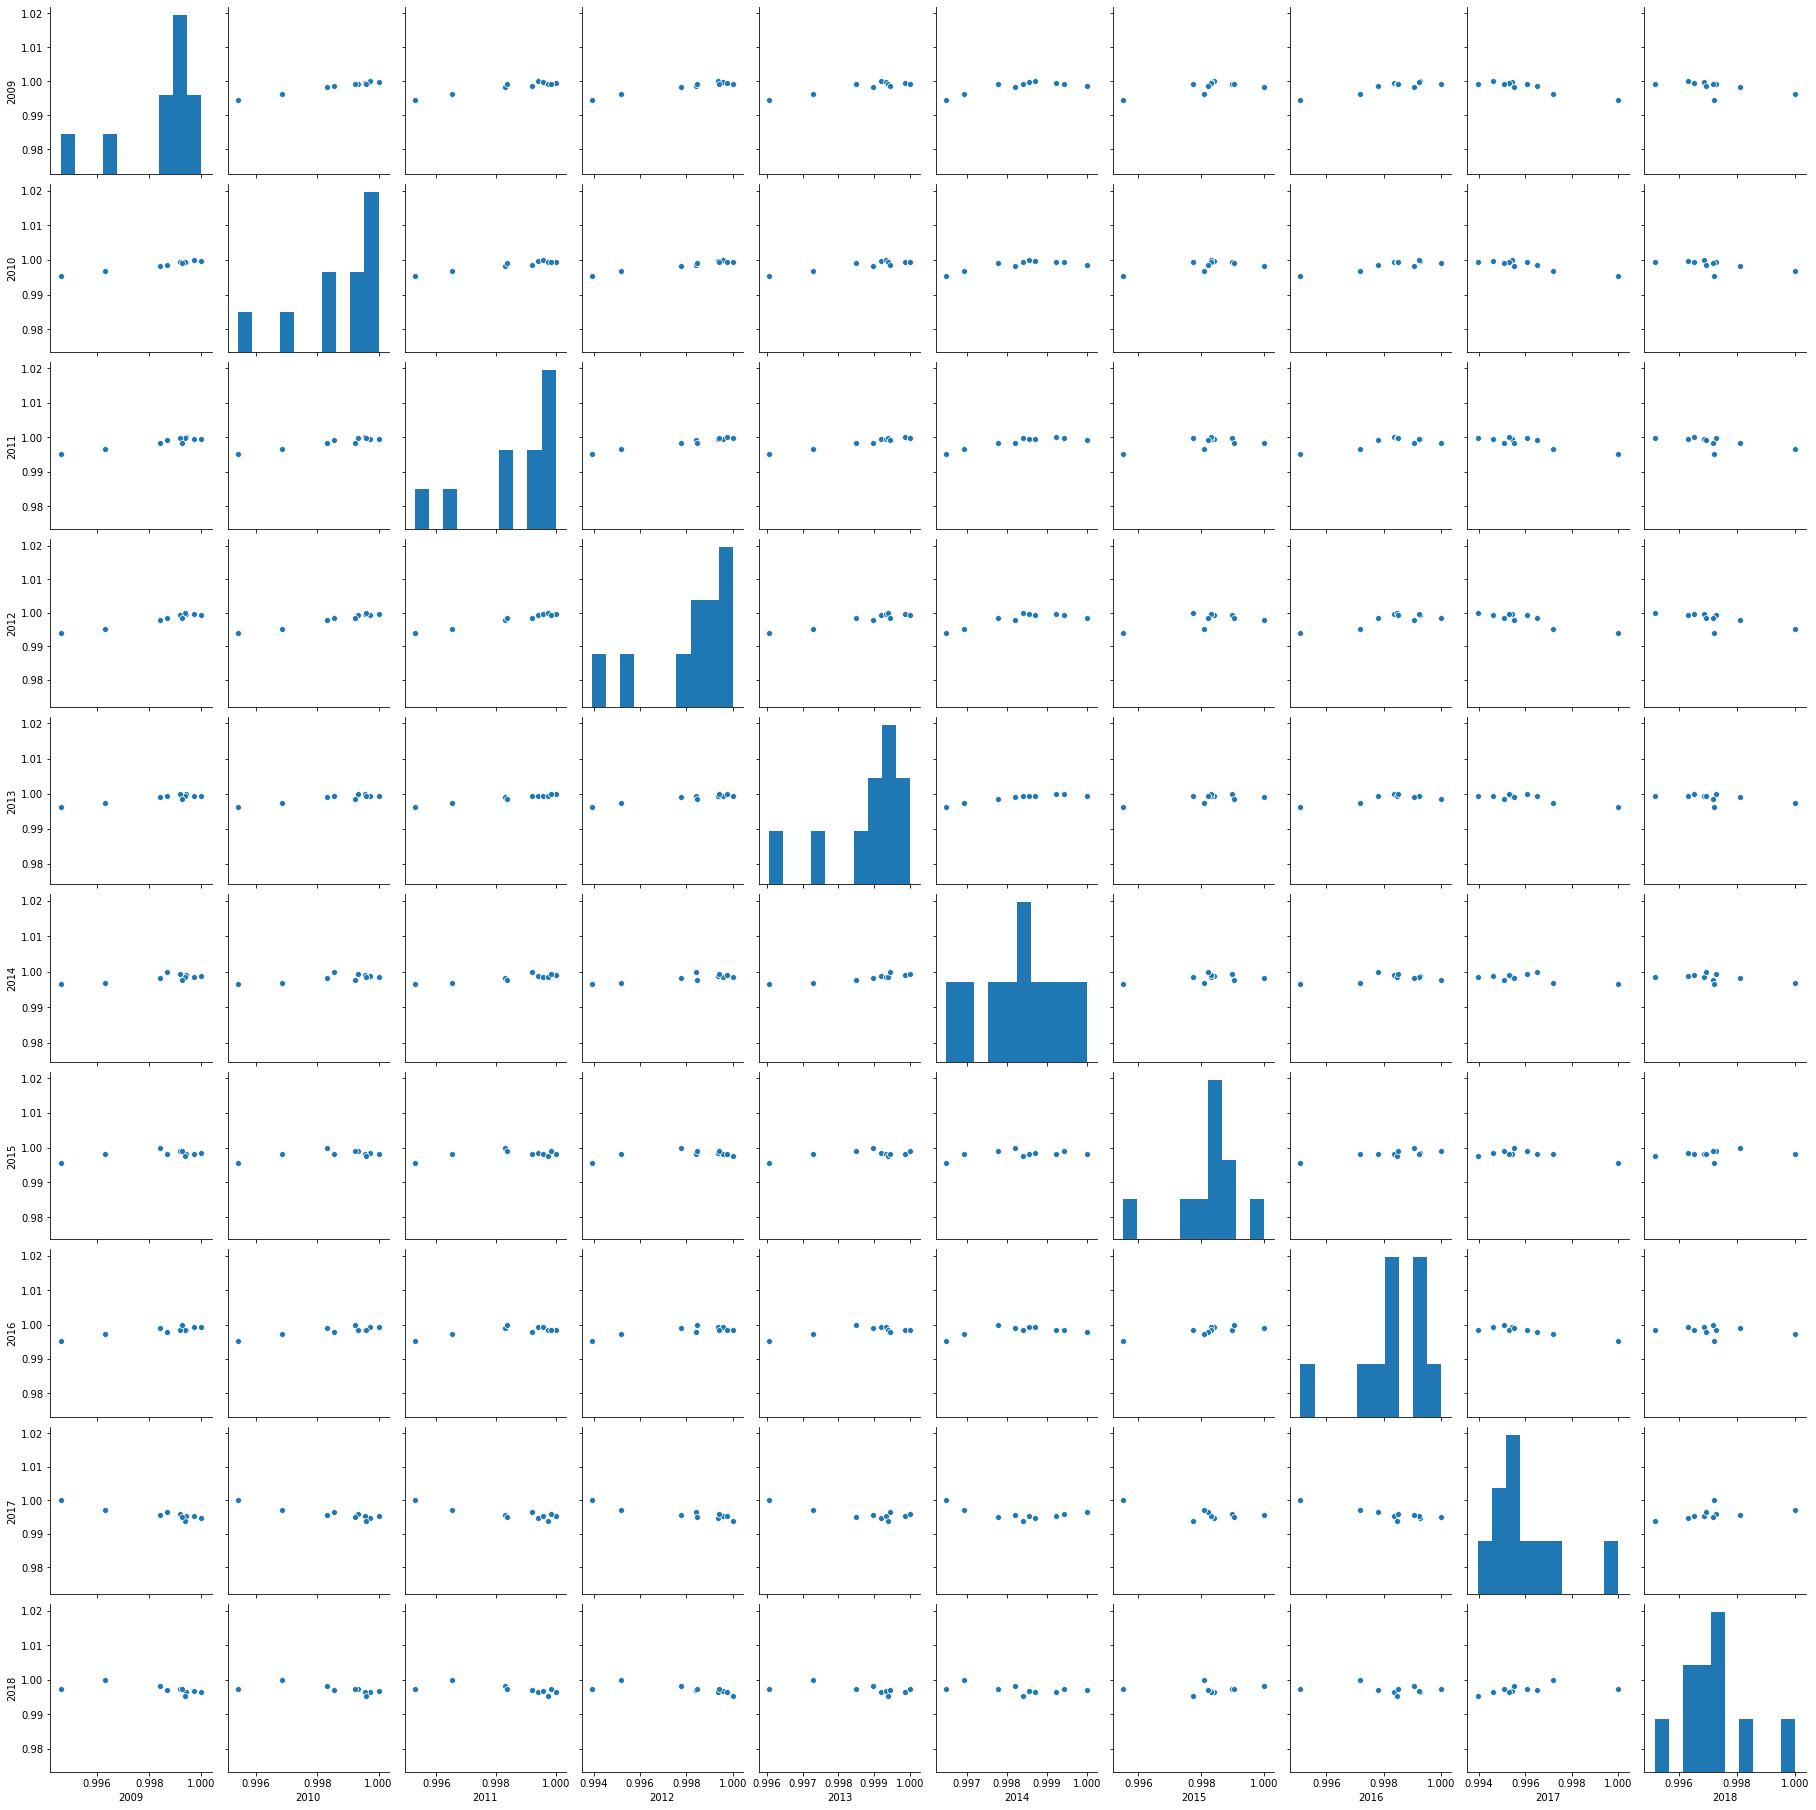

In [25]:
sns.pairplot(df_1)

In [26]:
import plotly.express as px
data=df_1
fig = px.imshow(df_1,
                labels=dict(x="years", y="Industy", color="Industry"),
                x=['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
                y=['Agriculture', 'Production', 'Construction','Retail','ICT','Finance','Real_Estate',' Professional_Service','Public_Adminstration','Other_Service']
               )
fig.update_xaxes(side="top")
fig.show()

To determine correlation value, the average of employee numbers is computed in the first segment.


- Year, wise correlation has been computed. Initially based on values from 2017 to 2018 a correlation has been computed.

- It is found that the correlation amount is .997 which is very close to ‘1’. Hence, there is a significant relationship between employee number and its growth rate between 2018 and 2017.

- Another year wise correlation has been done on base year and current year. The correlation value between these two years (2018 and 2009) is obtained as .996 that is again closer to ‘1’.

- Hence, there is a significant impact between the number of employees from both years (2018 and 2009). 


## 5. Clustering (k means&hierarchical)

#### 5.1. Using the best and worst performing year column’s employment data (2.3) undertake a K means clustering analysis (K=2 & 3) and identify industries cluster together.  Write your own interpretation(~100 words).


- From 2.3

#### Feature Scaling:

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
years=["2010","2018"]
create=df[years]
solutions_set=create.rename(columns={'2010':'Good','2018':'Bad'})
scaler = MinMaxScaler()  
solutions_set_scaled = scaler.fit_transform(solutions_set)
solutions_set_scaled = pd.DataFrame(solutions_set_scaled, columns = solutions_set.columns)
solutions_set_scaled

,Good,Bad
0,0.058416,0.038809
1,0.334653,0.342934
2,0.194554,0.186966
3,0.816584,0.786917
4,0.032921,0.015377
5,0.037624,0.025140
6,0.000000,0.000000
7,0.324752,0.395167
8,1.000000,1.000000
9,0.132178,0.138150


### Kmeans

K-means attempts to partition x data points to a group of k clusters where each data point is allocated to its nearest cluster.

- To start with k-means algorithm, you first have to randomly initialize points called the cluster centroids (K).K-means is an iterative algorithm and it does two steps: 
 
 1)  Cluster assignment 
 
 2) Move centroid step.


##### clusters?


proper value of ‘K’ is very difficult until we have a good knowledge about our data set.So to find optimal number of clusters:


1) Run k-means for different values of ‘K’. For example K varying from 1 to 100 and for each value of K compute SSE.


2) Plot a line chart K values on x axis and its corresponding values of SSE on y axis as shown below.

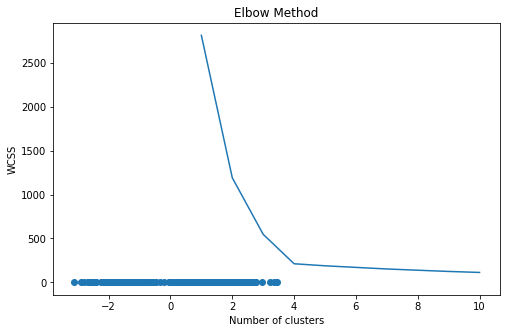

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

solutions_set_scaled,y= make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(solutions_set_scaled[:,0], solutions_set_scaled[:,1])


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(solutions_set_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




- K=2 and K=3

#### K=2

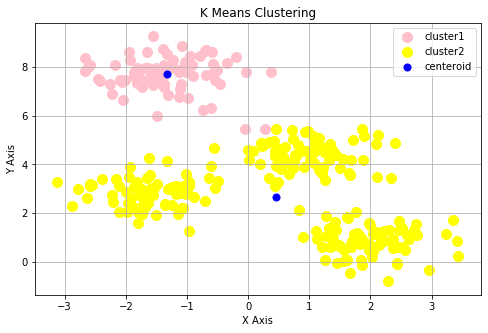

In [29]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(solutions_set_scaled)

plt.scatter(solutions_set_scaled[y_means == 0, 0], solutions_set_scaled[y_means == 0, 1], s = 100, c = 'pink', label = 'cluster1')
plt.scatter(solutions_set_scaled[y_means == 1, 0], solutions_set_scaled[y_means == 1, 1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid()
plt.show();

#### K-Means (3)

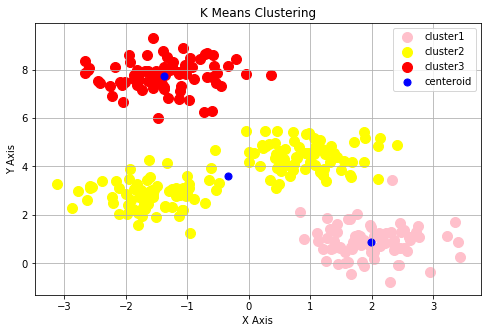

In [30]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(solutions_set_scaled)

plt.scatter(solutions_set_scaled[y_means == 0, 0], solutions_set_scaled[y_means == 0, 1], s = 100, c = 'pink', label = 'cluster1')
plt.scatter(solutions_set_scaled[y_means == 1, 0], solutions_set_scaled[y_means == 1, 1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(solutions_set_scaled[y_means == 2, 0], solutions_set_scaled[y_means == 2, 1], s = 100, c = 'red', label = 'cluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid()
plt.show();


- Calculated the mean distance between data points and their cluster centroid. So the goal is to choose a small value of k that still has a low SSE.

- We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point and more over before finding the data we need to scale down the features. Based on employee data clustering has been performed. K=2 clustering technique has been applied in the current context. According to data clustering is nothing but segment data in different classes in which data from similar groups are presented. As K=2 means clustering has been done in performed here therefore, two different centres have been chosen first one is worst perfomed years and other one is values good perfomed year 



### 5.2.	Using the same dataset (best & worst performing) create a hierarchical cluster.  Compare the cluster with k means clusters. 

Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram we can tell how the cluster is formed

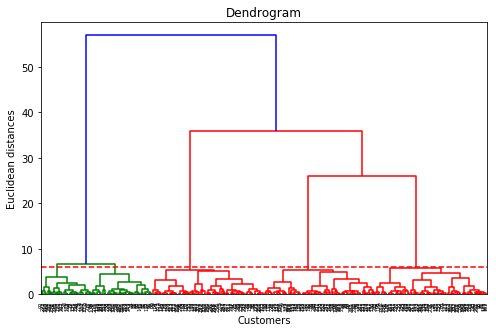

In [31]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(solutions_set_scaled, method = 'ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



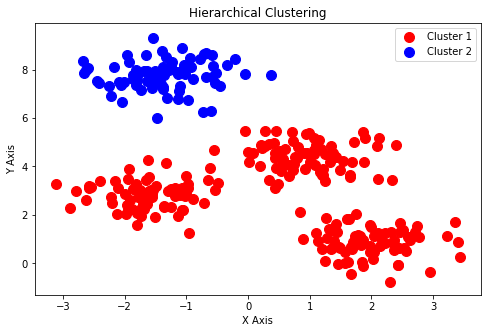

In [32]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(solutions_set_scaled)

# Visualising the clusters
plt.scatter(solutions_set_scaled[y_hc == 0, 0], solutions_set_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(solutions_set_scaled[y_hc == 1, 0], solutions_set_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Hierarchical Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

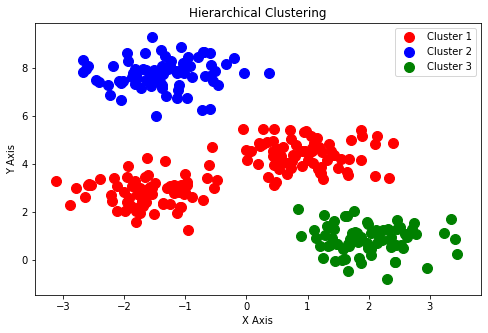

In [33]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(solutions_set_scaled)

# Visualising the clusters
plt.scatter(solutions_set_scaled[y_hc == 0, 0], solutions_set_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(solutions_set_scaled[y_hc == 1, 0], solutions_set_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(solutions_set_scaled[y_hc == 2, 0], solutions_set_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Hierarchical Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

Text(0.5, 1, 'Kendall correlation')

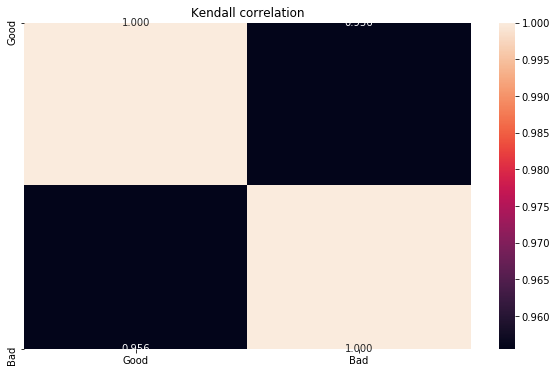

In [34]:
# kendall correlation between the submissions
plt.figure(figsize=(10, 6))
kendall = solutions_set.corr(method = 'kendall')
sns.heatmap(kendall, annot = True, fmt = ".3f")
plt.title('Kendall correlation')

The dendrogram shows how each cluster consists of drawing a relation between a non-singleton cluster and its branches. The top of the link shows the merge of the cluster and the two legs of the link suggest what clusters have been combined. The length of the two legs of the U-link is the distance between the child clusters.

## 6.	Discussion

### Provide a brief discussion (~ 300 words) on employment landscape of Wales based on the employment data analysis results


 - For this task, I have downloaded datasets from the Wales website (10 csv files) from the year 2009-2018. For the initial point, I used data wrangling techniques in order to load and clean the data, and eventually, I conquered all the csv files into one final file.
 
 - In the second stage, the highest and lowest workers in the respective industries were analyzed by(max) and (min) formulas for each industry for a range of years from (2009-2018) and the highest average number of employees was identified in the Public Administration Industry (4236500.0). On the other hand, the lowest average number of real estate employees was reported (189900.0). More details More information on ICT has more growth compared to other industries, and good performance in 2018 is very good in the coming year.
 
 -  As per the above scatter diagram, it can be identified that different designer plots are being used for different industries. In addition to this, the relationship between each value has been easily demonstrated in the above scatter plot diagram. Surprisingly, it can be easily determined that the values or numbers of employees from each industry are not that relative enough. Similar values always represent a congested scatter diagram. Based on the movement of each plot, movement of employment has been shown.
 
 - As per instructions given the principal component analysis is applied to the dataset and reduced to 2 components and the scatter diagram is plotted and found that there will be 3 clusters.
 
 - In order to determine the correlation value, the average number of employees is estimated in the first section. And there has been a connection between the two industries. The correlation value was obtained as.0.997, which is quite strong '.05' as a result; there is a relationship between workflow movements from both industries. There is also a major difference between the number of workers in both years (2018 and 2018)
 
 - K=2 means clustering technique has shown that values from less performing industries comes under in cluster 1 and values from good performece industires in cluster 2. Apart from K=2 means, K=3 means clustering also can be applied in the current context with given centroids

- Dendogram (A tree diagram ) approach is applied in order to find number of clusters in heirachial clustering and analyzed the clustering by applying 3 clusters and finally with analyzed digaram i came to know there is significant relation between the results of Kmeans and heirachial clustering

On a conclusion note:

Various techniques is applied in order to acheive above analysis and there are some challenges which I faced wheb dealing with this dataset is visual analytics with plotly and understanding the correlation concept

